# TD1: Temporal Discretization

With temporal discretization methods we can numerically solve Cauchy problems such as:
$$
    \begin{cases}
        u^\prime = f(u)\\
        u(0) = u_0
    \end{cases}
$$
where $u$ is typically a function $u : \mathbb{R} \rightarrow \mathbb{R}^d$ with $d$ the dimension of the problem (for $d = 2$ we may also find $u : \mathbb{R} \rightarrow \mathbb{C}$).
In this first TD we will review some of the basic methods to solve Ordinary Differential Equations (ODEs) before studying one of the most famous chaotic dynamical system: the Lorenz system.

## Part 1: The Exponential system

We want to study in this part several linear one-stage methods to solve the following system on $[0,T]$:
$$\begin{cases}
    u^\prime=\alpha u \\
    u (0) = u_0
\end{cases}
$$
with $u : [0,T] \rightarrow \mathbb{C}$, $\alpha \in \mathbb{C}$ and $u_0 \in \mathbb{C}$.
We discretize the interval $[0, T]$ into $N + 1$ equally spaced points $\{0, \Delta t, ..., N \Delta t\}$ defining the time step $\Delta t$ as $\Delta t = \frac{T}{N}$. The solution of this Cauchy problem is analytical and we will note $u(t) = u_0 e^{\alpha t}$ its unique solution.

We will make a clear distinction between the exact solution $u$ and its numerical approximations $u_{\text{num},*}$ where the * character refers to the selected numerical scheme.

More precisely, $u_{\text{num},*} = (u_{\text{num},*}^{(n)})_{n\in\{ 0 ,..., N\}}$ will be a finite sequence of N + 1 (potentially complex) numbers such that $u_{\text{num},*}^{(n)}$ approximates the value of the exact solution $u (n \Delta t)$.

In the following, Python codes will only need *numpy* and *matplotlib* packages.

In [1]:
# To draw matplotlib plots within this notebook.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We will also use the following parameters:

In [2]:
T = 10.0
N = 100
dt = T / N

**1) Forwards Euler:** We recall that Forwards Euler method (FE) is a first order method which computes the value of $u (t + \Delta t)$ given $u(t)$ using the following Taylor expansion:
$$
    u (t + \Delta t) = u(t) + \Delta t~f (u(t)) + \mathcal{O}(\Delta t ^2)
$$
Express $u_{\text{num},\text{FE}}^{(n + 1)}$ as a function of $u_{\text{num},\text{FE}}^{(n)}$. This relation is the reccurence relation of Forwards Euler method.

Then, what is the expression of $u_{\text{num},\text{FE}}^{(n)}$ as a function of $u_{\text{num},\text{FE}}^{(0)} = u_0$?

We have that:
$$
u^{(n+1)}_{num, FE} = u^{(n)}_{num, FE} + \Delta t f(u^{(n)}_{num, FE})
$$
Then we have that:
$$
u_{num, FE}^{(n)} = u_0 + \Delta t f(u_0) + \Delta t f(u_0 + \Delta t f(u_0)) + \cdots + \Delta t f(u_0 + \Delta t f(u_0) + f(u_0 + \Delta t f(u_0)) + \cdots )
$$

**2)** We define $q = \alpha \Delta t$ and pick $u_0 = 1$. Program a Forwards Euler based solving method (using the recurrence relation) of the exponential system on $[0,T]$ and plot the numerical solution and the exact solution for several real values of $q$ (both positive and negative values). Can you observe some numerical instabilities?

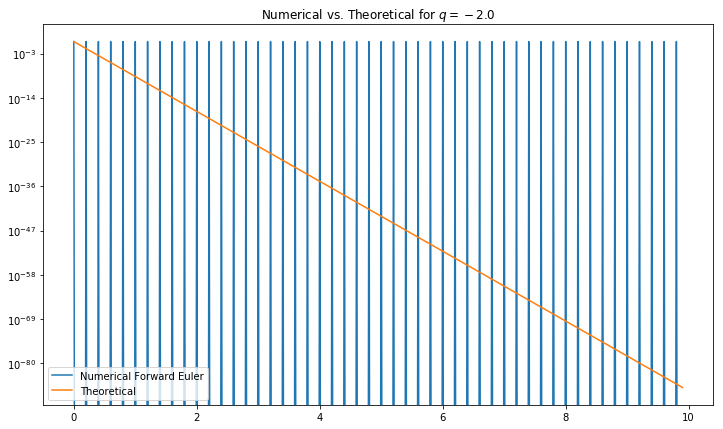

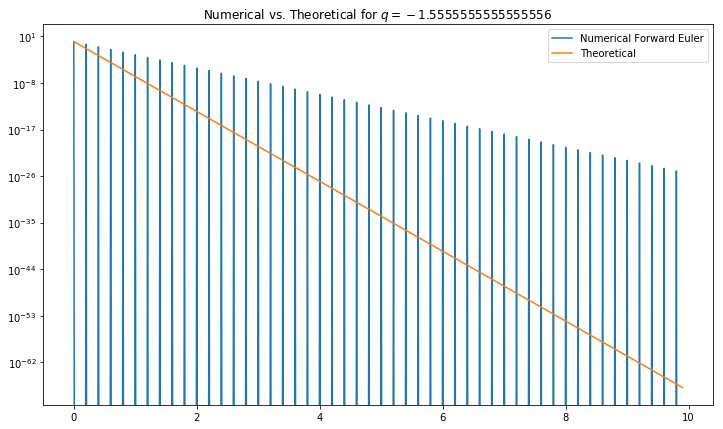

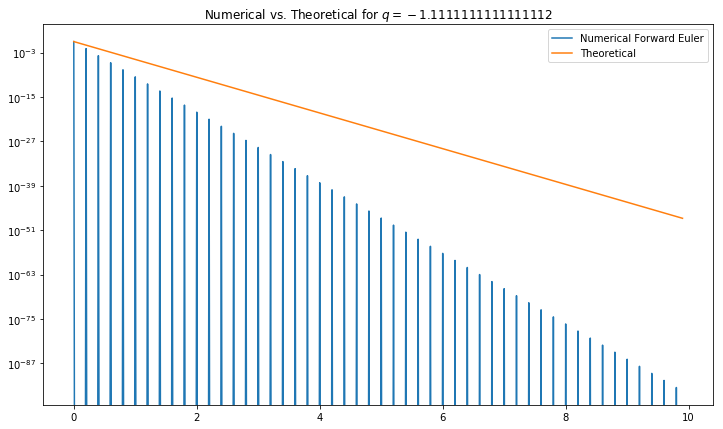

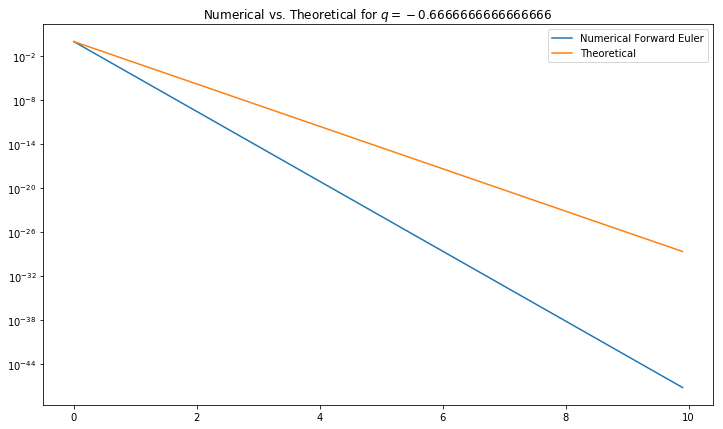

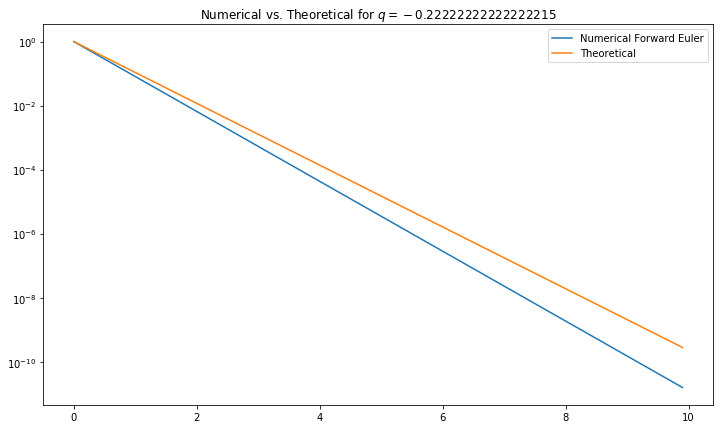

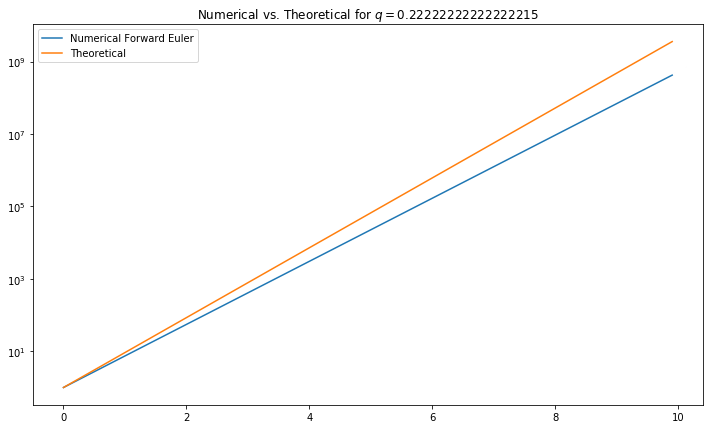

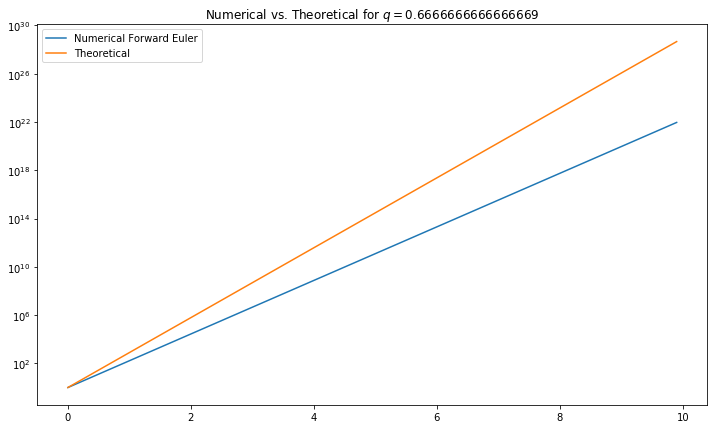

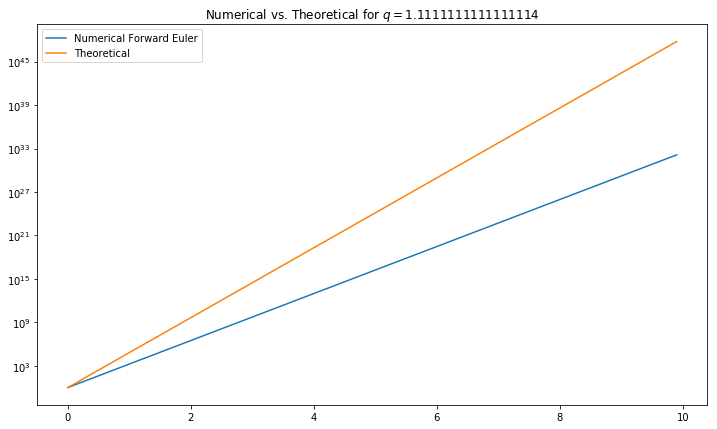

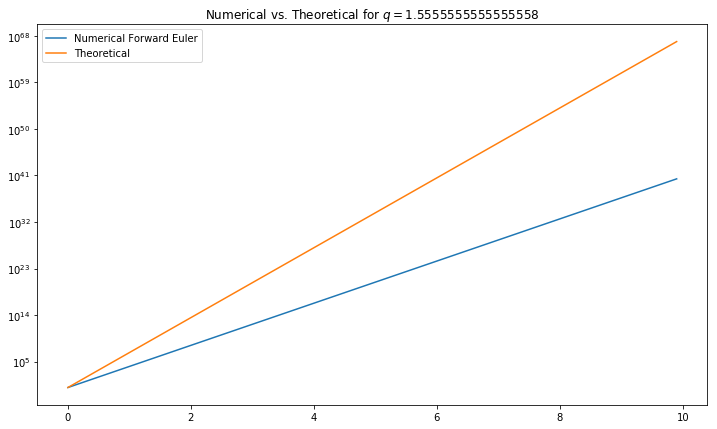

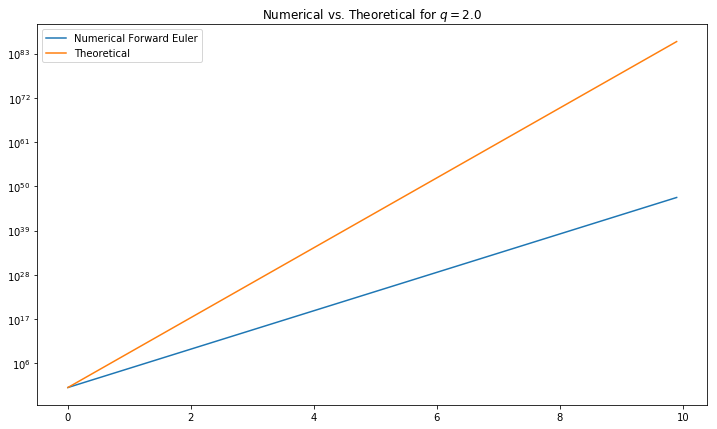

In [3]:
def forward_euler_step(f, un, dt = dt):
    return un + dt * f(un)

def forward_euler(f, df, u0, dt = dt, tmin = 0, tmax = T):
    xtab = np.arange(tmin, tmax, dt)
    if u0.dtype == np.int32:
        print('Are you sure you wanted the values to be integers ?')
    ytab = np.zeros((len(xtab), u0.size), dtype = u0.dtype)
    u = u0
    ytab[0] = u
    for i in range(1, len(xtab)):
        u = forward_euler_step(f, u, dt)
        ytab[i] = u
    return xtab, ytab

def plot_methods(sols, f, df, u0, alphaTab, theory, dt = dt, tmin = 0, tmax = T, logscale = True, names = None):
    if names == None:
        names = np.arange(1, len(sols) + 1, 1)
    for alpha in alphaTab:
        plt.figure(figsize = (12, 7))
        plt.title('Numerical vs. Theoretical for $q = {}$'.format(alpha*dt))
        for i, sol in enumerate(sols):
            xtab, ytab = sol(lambda x : f(alpha, x), lambda x : df(alpha, x), u0, dt, tmin, tmax)
            plt.plot(xtab, np.real(ytab), label = 'Numerical {}'.format(names[i]))
        plt.plot(xtab, np.real(theory(alpha, xtab)), label = 'Theoretical')
        if logscale:
            plt.yscale('log')
        plt.legend()
        plt.show() 
        
plot_methods([forward_euler], lambda alpha, x : alpha * x, None, np.array(1.0), 
             np.linspace(-20, 20, 10), lambda alpha, x : np.exp(alpha * x), 
             logscale = True, names = ['Forward Euler'])


**3) Backwards Euler / Crank-Nicolson:** Same questions for Backwards Euler method and Crank-Nicolson method. We recall that Backwards Euler method relies on the following expansion:
$$
    u (t + \Delta t) = u(t) + \Delta t~f(u(t + \Delta t)) + \mathcal{O}(\Delta t ^2)
$$
and that Crank-Nicolson relies on the following expansion:
$$
    u (t + \Delta t) = u(t) + \frac{\Delta t}{2}\left(f\left(u\left(t\right)\right) + f\left(u\left(t + \Delta t\right)\right)\right) + \mathcal{O}(\Delta t ^3)
$$

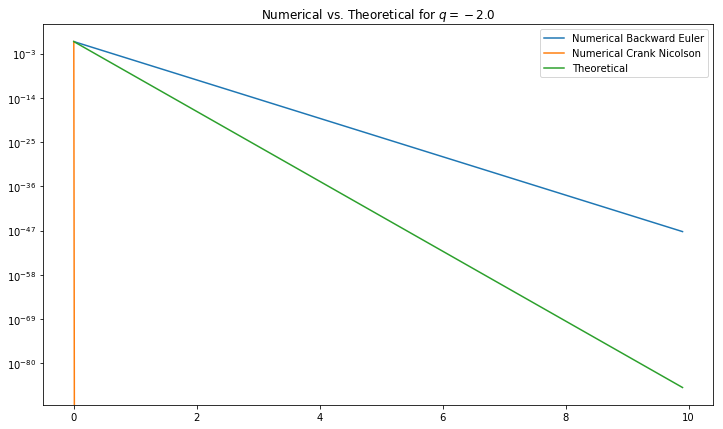

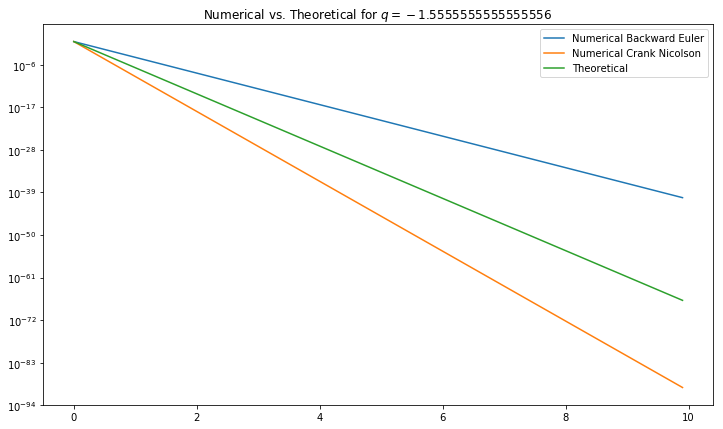

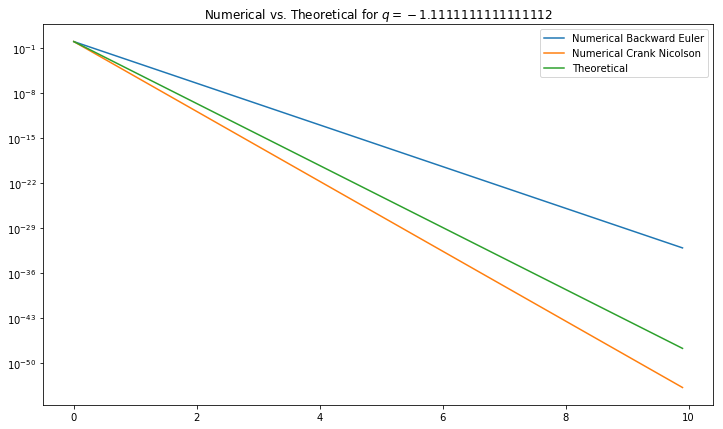

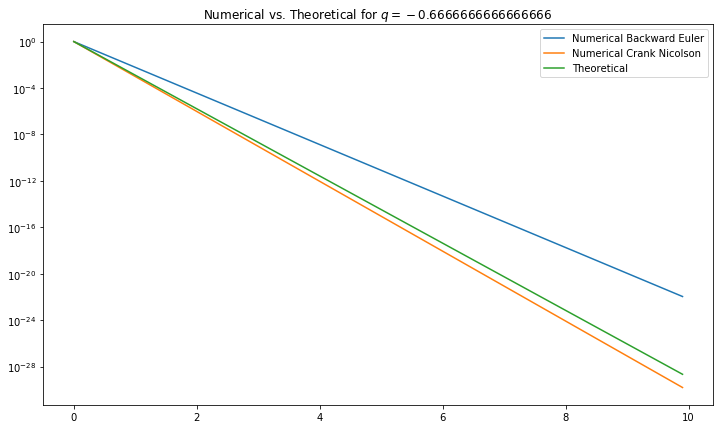

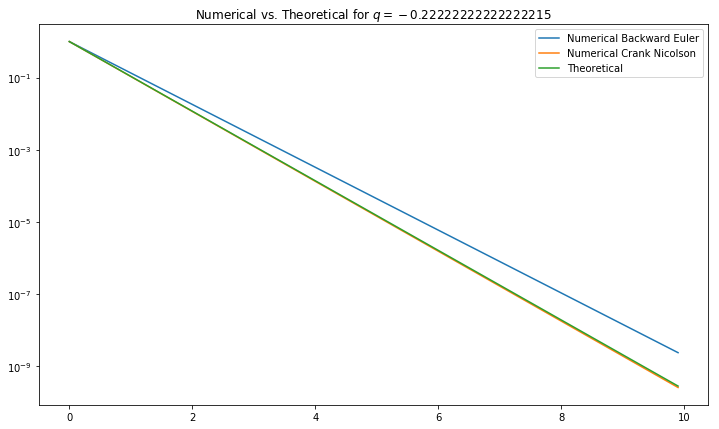

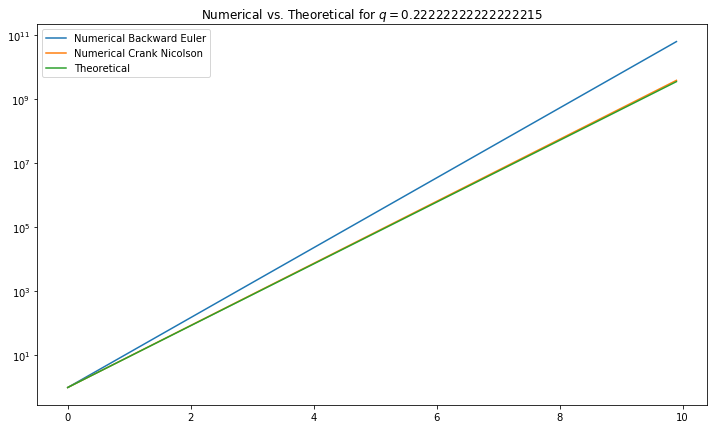

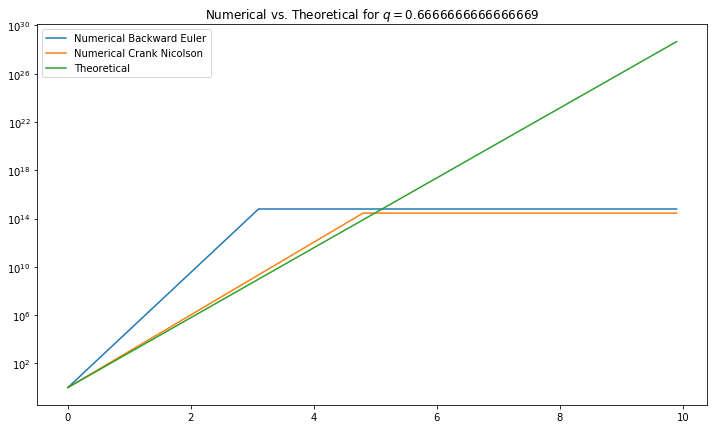

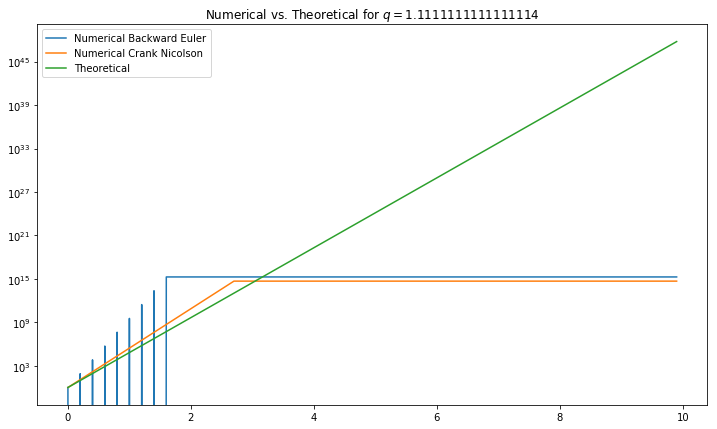

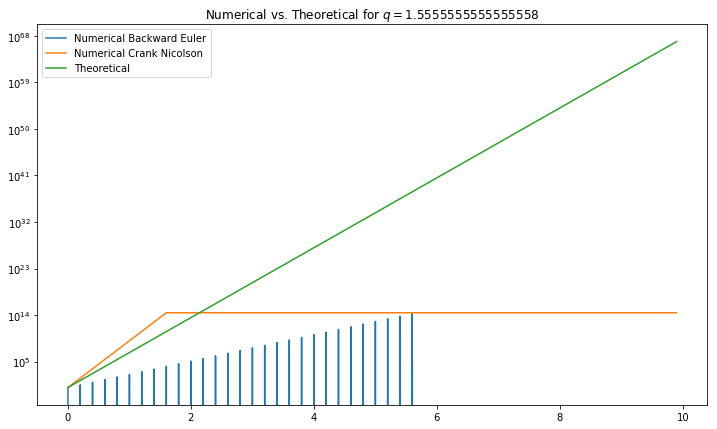

c:\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


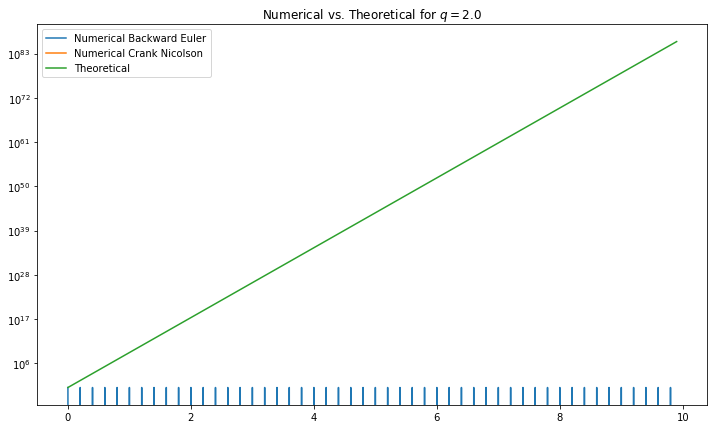

In [4]:
def newton(f, fp, x0, eps = 1e-2, max_iter = 1e4):
    xprev = x0 - 2*eps
    x = x0
    i = 0
    while (np.sqrt(np.abs(np.dot(x - xprev, x - xprev))) > eps and i < max_iter): 
        xprev = x
        x = x - f(x)/fp(xprev)
        i += 1
    return x

def backward_euler_step(f, fp, un, dt = dt):
    return newton(lambda x : x - un - dt*f(x), lambda x : 1 - dt*fp(x), un)

def backward_euler(f, fp, u0, dt = dt, tmin = 0, tmax = T):
    xtab = np.arange(tmin, tmax, dt)
    if u0.dtype == np.int32:
        print('Are you sure you wanted the values to be integers ?')
    ytab = np.zeros((len(xtab), u0.size), dtype = u0.dtype)
    u = u0
    ytab[0] = u
    for i in range(1, len(xtab)):
        u = backward_euler_step(f, fp, u, dt)
        ytab[i] = u
    return xtab, ytab

def crank_nicolson_step(f, fp, un, dt = dt):
    return newton( lambda x : x - un - dt/2 * (f(un) + f(x)), lambda x : 1 - dt/2 * fp(x), un)

def crank_nicolson(f, fp, u0, dt = dt, tmin = 0, tmax = T):
    xtab = np.arange(tmin, tmax, dt)
    if u0.dtype == np.int32:
        print('Are you sure you wanted the values to be integers ?')
    ytab = np.zeros((len(xtab), u0.size), dtype = u0.dtype)
    u = u0
    ytab[0] = u
    for i in range(1, len(xtab)):
        u = crank_nicolson_step(f, fp, u, dt)
        ytab[i] = u
    return xtab, ytab

plot_methods([backward_euler, crank_nicolson], lambda alpha, x : alpha * x, 
             lambda alpha, x : alpha, np.array(1.0), np.linspace(-20, 20, 10), 
             lambda alpha, x : np.exp(alpha*x), logscale = True, 
             names = ['Backward Euler', 'Crank Nicolson'])




**4)** Compare on this example the three previous methods by plotting the three numerical solutions next to the exact solution. We will use a value of $q$ which is included in the absolute stability region of every method.

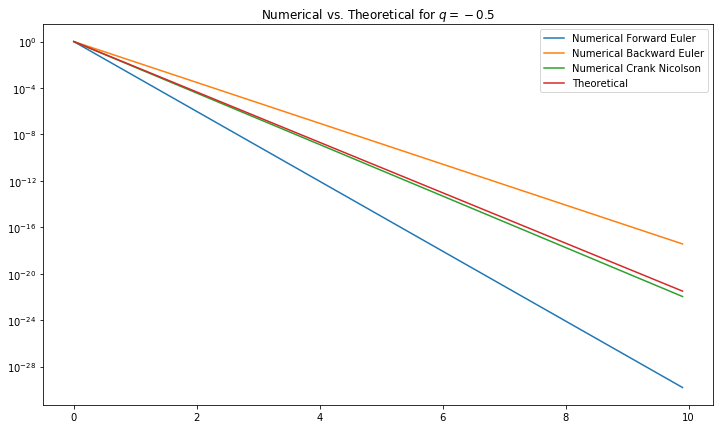

In [5]:
plot_methods([forward_euler, backward_euler, crank_nicolson], lambda alpha, x : alpha * x, 
             lambda alpha, x : alpha, np.array(1.0), np.array([-5]), 
             lambda alpha, x : np.exp(alpha * x), logscale = True, 
             names = ['Forward Euler', 'Backward Euler', 'Crank Nicolson'])


**5)** Show theoretically that Crank-Nicolson scheme is a second-order method.

A direct Taylor Expansion yields the desired result.

## Part 2: The Harmonic Oscillator

We now want to solve the following Cauchy problem on $[0,T]$:
$$\begin{cases}
    u^{\prime\prime} +\omega^2 u =0\\
    u(0) = u_0\\
    u^\prime(0) = u^\prime_0
\end{cases}
$$
where $u : [0,T] \rightarrow \mathbb{R}$, $\omega\in\mathbb{R}$, $u_0 \in \mathbb{R}$ and $u^\prime_0 \in \mathbb{R}$.

**1)** Introducing $v = \frac{u^\prime}{\omega}$, show that this sytem is equivalent to a complex exponential system such as defined in the previous part. We will express $\alpha$ in terms of $\omega$.

$$
\begin{cases}
\frac{d}{dt} (u + iv) = u' + i v' = \omega v + i u''/\omega = \omega v - i \omega u = (-i\omega)(u + iv)\\
(u + iv) = u_0 + i \frac{u'_0}{\omega}
\end{cases}
$$

**2)** Solve numerically this system for $\omega = 1$ using Forwards Euler method, Backwards Euler method, Crank-Nicolson method.

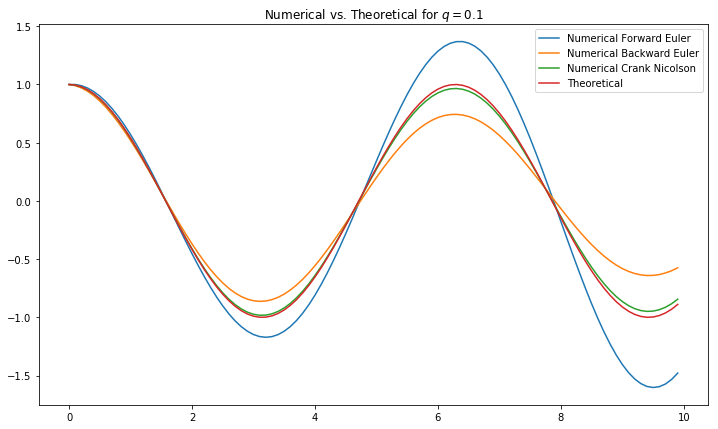

In [6]:
j = np.complex(0,1)

plot_methods([forward_euler, backward_euler, crank_nicolson], lambda omega, x : (-j * omega) * x, 
             lambda omega, x : omega, np.array(1.0 + 0*j), np.array([1.0]), 
             lambda omega, x : np.exp((-j * omega) * x), logscale = False, 
             names = ['Forward Euler', 'Backward Euler', 'Crank Nicolson'])


**3)** Plot the previous numerical solutions in the $(u, v)$ plan. If we want to enforce energy conservation in this system, which numerical method should we use? Explain theoretically what we observe following the selected numerical method.

<Figure size 864x504 with 0 Axes>

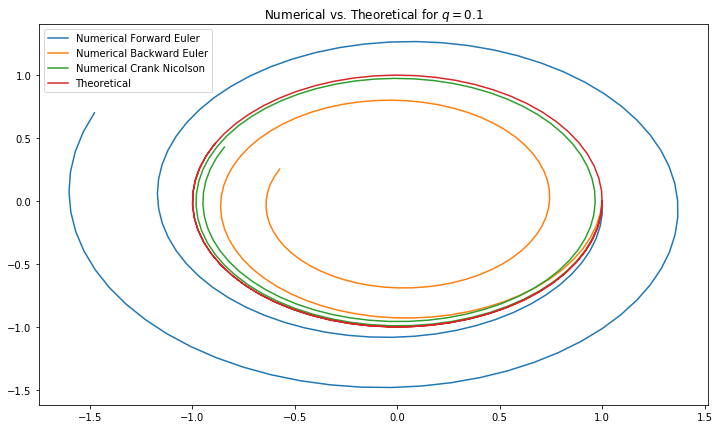

In [7]:
plt.figure(figsize= (12, 7))

def plot_phase(sols, f, df, u0, alphaTab, theory, dt = dt, tmin = 0, tmax = T, names = None):
    if names == None:
        names = np.arange(1, len(sols) + 1, 1)
    for alpha in alphaTab:
        plt.figure(figsize = (12, 7))
        plt.title('Numerical vs. Theoretical for $q = {}$'.format(alpha*dt))
        for i, sol in enumerate(sols):
            xtab, ytab = sol(lambda x : f(alpha, x), lambda x : df(alpha, x), u0, dt, tmin, tmax)
            plt.plot(np.real(ytab), np.imag(ytab), label = 'Numerical {}'.format(names[i]))
        plt.plot(np.real(theory(alpha, xtab)), np.imag(theory(alpha, xtab)), label = 'Theoretical')
        plt.legend()
    plt.show() 

plot_phase([forward_euler, backward_euler, crank_nicolson], lambda omega, x : (-j * omega) * x, 
             lambda omega, x : omega, np.array(1.0 + 0*j), np.array([1.0]), 
             lambda omega, x : np.exp((-j * omega) * x), 
             names = ['Forward Euler', 'Backward Euler', 'Crank Nicolson'])


## Part 3: A chaotic dynamical system: the Lorenz system

We are now interested in the Lorenz system, first studied by the mathematician and meteorologist Edward Lorenz to model the atmospheric convection (we will refer to the following [Wikipedia page](https://en.wikipedia.org/wiki/Lorenz_system)). The Lorenz system is defined as follows:
$$\begin{cases}
x^\prime = \sigma(y - x)\\
y^\prime = x (\rho - z) - y\\
z^\prime = xy - \beta z
\end{cases}
$$
where $x, y, z : \mathbb{R} \rightarrow \mathbb{R}$ and $\sigma, \rho, \beta \in \mathbb{R}$ are some numerical parameters. Lorenz first used the following values of the parameters:

In [8]:
rho = 28.0
sigma = 10.0
beta = 8/3

We want to solve the Lorenz system using Runge-Kutta multistage methods. We will call RK2, the following Runge-Kutta method:
$$
    U_1 = u(t)\\
    U_2 = u(t) + \Delta t~f(U_1)\\
    u(t + \Delta t) = u(t) + \frac{\Delta t}{2}(f(U_1) + f(U_2)) + \mathcal{O}(\Delta t^3)
$$

**1)** Show theoretically that RK2 is a second-order method.

**2)** Solve numerically the Lorenz system on the interval $[0,T]$ using RK2 method with the following initial values: $x (0) = y (0) = z (0) = 1$. We will use at least $T = 100$ and $N = 10000$.

In [9]:
def runge_kutta_one_step(f, un, dt = dt):
    u1 = un
    u2 = un + dt*f(u1)
    return un + dt/2 * (f(u1) + f(u2))

def runge_kutta(f, df, u0, dt = dt, tmin = 0, tmax = T):
    xtab = np.arange(tmin, tmax, dt)
    ytab = np.zeros((len(xtab), u0.size), dtype=u0.dtype)
    u = u0
    ytab[0] = u
    for i in range(1, len(xtab)):
        u = runge_kutta_one_step(f, u, dt)
        ytab[i] = u
    return xtab, ytab

xtab, ytab = runge_kutta( lambda x : np.array([sigma*(x[1] - x[0]), x[0]*(rho - x[2]) - x[1], x[0]*x[1] - beta *x[2]]),
                        None, np.array([1.0, 1.0, 1.0]), dt = 100/10000, tmin = 0, tmax = 100)



**3)** Plot the solution in the 3D-space $(x,y,z)$. We can use *[mpl_toolkits.mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)* package for 3D plots.

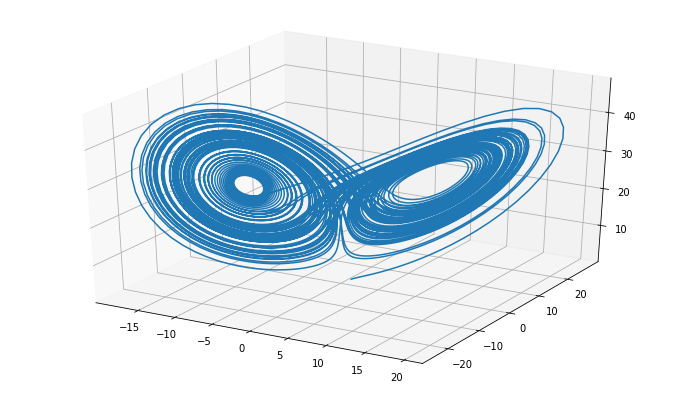

In [12]:
fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(ytab[:, 0], ytab[:, 1], ytab[:, 2])
plt.show()

We call this figure the *Lorenz attractor*.
The Lorenz system exhibits chaotic behaviors for some specific values of its parameters: this means that solutions are highly senstive to initial conditions.

**4)** For the same values of the parameters, slightly change the initial conditions and observe this chaotic behavior.

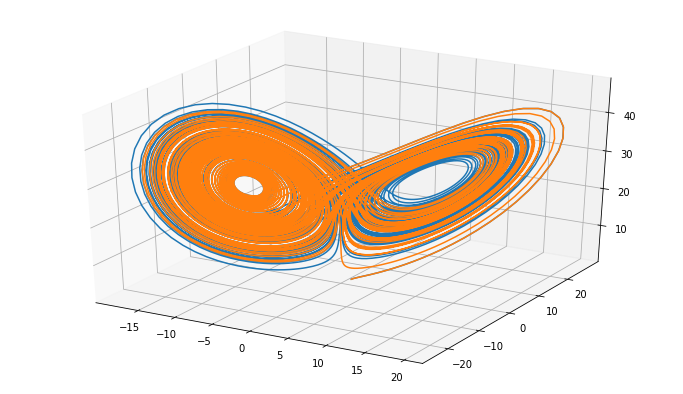

In [16]:
dx, dy, dz = 1e-2, 1e-2, -1e-2

xtab2, ytab2 = runge_kutta( lambda x : np.array([sigma*(x[1] - x[0]), x[0]*(rho - x[2]) - x[1], x[0]*x[1] - beta *x[2]]),
                        None, np.array([1.0 + dx, 1.0 + dy, 1.0 + dz]), dt = 100/10000, tmin = 0, tmax = 100)

fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(ytab[:, 0], ytab[:, 1], ytab[:, 2])
ax.plot(ytab2[:, 0], ytab2[:, 1], ytab2[:, 2])
plt.show()